# Load libraries

In [1]:
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import shuffle
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import networkx as nx
import itertools
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import TweedieRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Load data

In [2]:
blue=pd.read_csv('fad_blue_rnadata.csv').rename(columns={"Unnamed: 0": "Cells"})
blue.set_index("Cells", drop=True,inplace=True)
blue=blue.T
#^transpose because we want genes to be features

In [3]:
idx=blue.index 
y=blue['BlueFP']
x=blue.drop(['BlueFP'],axis=1)
genes=x.columns
#set x and y
x1=x.to_numpy()

# Use poisson distribution, find best alpha

Simple way of testing best alpha

In [4]:
alpha_vals=[1,2,3,10,30,60,100,150,200] 
scores=0
MSEs=999999999999999
for n in alpha_vals:
    #split into train and test
    X_train2, X_test2, y_train, y_test = train_test_split(x1, y, test_size=0.2)
    scaler = preprocessing.StandardScaler().fit(X_train2)
    #scale using x_train model for both train & test
    X_train = scaler.transform(X_train2) 
    X_test= scaler.transform(X_test2) 
    reg = TweedieRegressor(power=1, link='log',alpha=n,max_iter=1000)   
    reg.fit(X_train,y_train)
    scoretemp=reg.score(X_test,y_test) 
    y_pred=reg.predict(X_test)
    MSE_temp=np.sqrt(mean_squared_error(y_test,y_pred))#actually RMSE
    print('alpha value: '+str(n))
    print('Score: '+str(scoretemp))
    print('RMSE: '+str(MSE_temp))
    print()
    if MSEs>MSE_temp:
        MSEs=MSE_temp
        scores=scoretemp
        best_a=n
        best_params=reg.get_params()
print('Best: ')
print('Score (D^2): '+str(scores)) 
print('Root mean squared error: '+str(MSEs)) 
print('Alpha: '+str(best_a)) 

alpha value: 1
Score: 0.2724639285724413
RMSE: 6.200653640282682

alpha value: 2
Score: 0.32833809393574187
RMSE: 7.343032206150653

alpha value: 3
Score: 0.1950546350593818
RMSE: 8.213535891600007

alpha value: 10
Score: 0.30694828313663347
RMSE: 6.542248437525455

alpha value: 30
Score: 0.43028476529660853
RMSE: 6.048710063094709

alpha value: 60
Score: 0.3230974200640584
RMSE: 5.845937200498964

alpha value: 100
Score: 0.31326309665803564
RMSE: 7.698461253697973

alpha value: 150
Score: 0.34405155523059683
RMSE: 6.019239437101051

alpha value: 200
Score: 0.2823073145408411
RMSE: 5.448796119673155

Best: 
Score (D^2): 0.2823073145408411
Root mean squared error: 5.448796119673155
Alpha: 200


In [5]:
best_params

{'alpha': 200,
 'fit_intercept': True,
 'link': 'log',
 'max_iter': 1000,
 'power': 1,
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

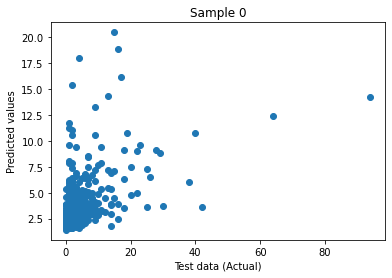

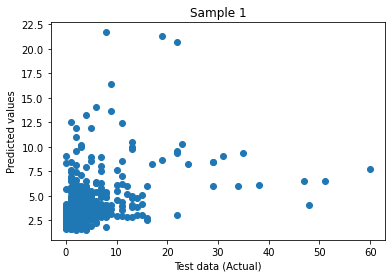

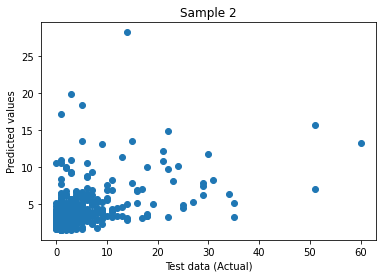

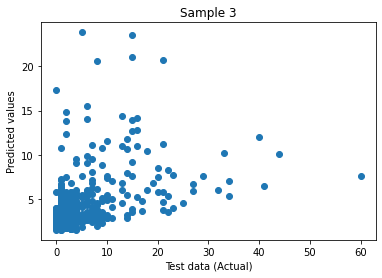

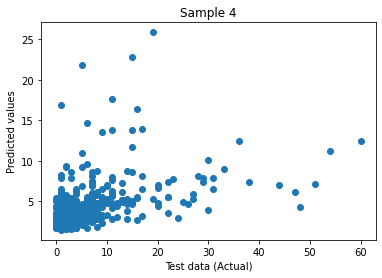

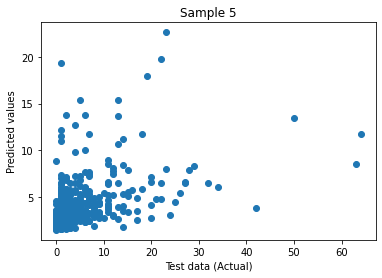

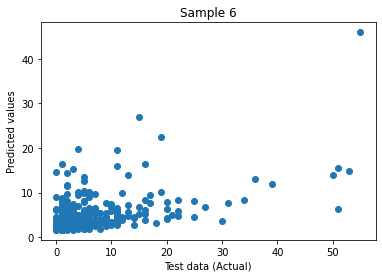

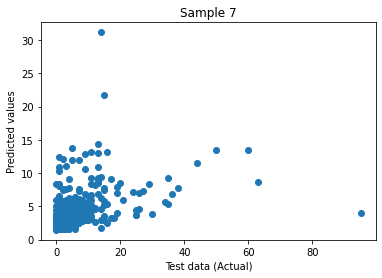

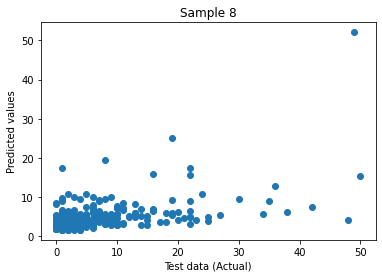

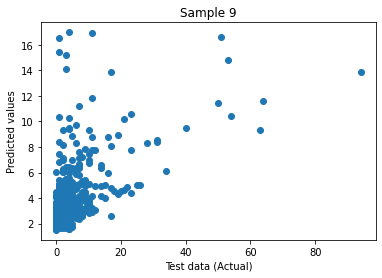

Average score (D^2): 
0.3289739152301422
Average root mean squared error: 
5.846417817730261


In [6]:
numruns=10
scores=0
MSEs=0
for n in range(numruns):
    #split into train and test
    X_train2, X_test2, y_train, y_test = train_test_split(x1, y, test_size=0.2)
    scaler = preprocessing.StandardScaler().fit(X_train2)
    #scale using x_train model for both train & test
    X_train = scaler.transform(X_train2) 
    X_test= scaler.transform(X_test2) 
    reg = TweedieRegressor(power=1, link='log',alpha=best_a,max_iter=1000)  
    reg.fit(X_train,y_train)
    scoretemp=reg.score(X_test,y_test)
    scores+=scoretemp
    y_pred=reg.predict(X_test)
    MSEs+=np.sqrt(mean_squared_error(y_test,y_pred))#actually RMSE
    plt.scatter(y_test,y_pred)
    plt.xlabel('Test data (Actual)')
    plt.ylabel('Predicted values')
    plt.title('Sample '+str(n)) 
    plt.show()
print('Average score (D^2): ')
print(scores/numruns)
print('Average root mean squared error: ')
print(MSEs/numruns)

In [7]:
coefs=reg.coef_
most_imp=np.where(coefs > .003)[0]

In [8]:
genes[most_imp]

Index(['AAVbarcode2', 'AAVbarcode6'], dtype='object', name='Cells')

In [9]:
# genes and coefs into pandas df and sort
d = {'Genes': genes, 'Coefficients': coefs}
df = pd.DataFrame(data=d)
#list of other trans genes
values = ['AAVbarcode1','AAVbarcode2','AAVbarcode3','AAVbarcode4','AAVbarcode5','AAVbarcode6']
#drop rows that contain any value in the list
df = df[df.Genes.isin(values) == False]
#sort
df_sorted=df.sort_values(by='Coefficients')

In [10]:
#only take most negative or most positive values
df1=df_sorted.tail(50)
df2=df_sorted.head(50)
df3=pd.concat([df1,df2])
df3.to_csv('data/top100_genes.csv')

In [11]:
#only take most negative or most positive values
df1=df_sorted.tail(250)
df2=df_sorted.head(250)
df3=pd.concat([df1,df2])
df3.to_csv('data/top500_genes.csv')